In [19]:
import time
import os
import pandas as pd
import numpy as np
from glob import glob
from activity_detector import ActivityDetector
import lateral_events
import longitudinal_events
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
data_folder = os.path.join('..', '..', '..', '..', '..', 'TNO', 'Manders, T.M.C. (Jeroen) - ERP2017Release')
datafiles = glob(os.path.join(data_folder, 'Data', '*.hdf5'))
signal_descriptions = pd.read_csv(os.path.join(data_folder, 'signal_descriptions.csv'), 
                                  index_col=0).squeeze().to_dict()

In [21]:
df = pd.read_hdf(datafiles[0])
df.keys()
AD = ActivityDetector(df.copy())

# Longitudinal activities host vehicle

In [ ]:
# Prepare dataframe for usage of "longitudinal_events"
settings = dict(fps=100)
df['odom_vx'] = df['Host_vx']*3.6

In [ ]:
tstart = time.time()
_, events = longitudinal_events.get_ego(settings, df)
print("Elapsed time: {:.2f} s".format(time.time() - tstart))

In [ ]:
tstart = time.time()
events2 = [(index, event.value) for index, event in AD.long_activities_host()]
print("Elapsed time: {:.2f} s".format(time.time() - tstart))
assert events == events2, "Events not the same :("

# Lateral activities host vehicle

In [ ]:
# Prepare dataframe for usage of "longitudinal_events"
df = df.rename(columns={'Host_line_left_c0': 'line_left_y',
                        'Host_line_right_c0': 'line_right_y',
                        'Host_line_left_quality': 'lines_0_confidence',
                        'Host_line_right_quality': 'lines_1_confidence'})

In [ ]:
tstart = time.time()
_, events = lateral_events.get_ego(settings, df)
print("Elapsed time: {:.2f} s".format(time.time() - tstart))

In [ ]:
tstart = time.time()
events2 = [(index, event.value) for index, event in AD.lat_activities_host()]
print("Elapsed time: {:.2f} s".format(time.time() - tstart))
assert events == events2, "Events not the same :("

# Longitudinal activities target

In [ ]:
i_target = 1
target_df = df[['Target_{:d}_vx'.format(i_target)]].copy()
# target_df['odom_vx'] = target_df['Target_{:d}_vx'.format(i_target)]*3.6
target_df['odom_vx'] = target_df['Target_{:d}_vx'.format(i_target)]*3.6

In [ ]:
tstart = time.time()
_, events = longitudinal_events.get_target(settings, target_df)
print("Elapsed time: {:.2f} s".format(time.time() - tstart))

In [ ]:
tstart = time.time()
events2 = [(index, event.value) for index, event in AD.long_activities_target_i(i_target)]
print("Elapsed time: {:.2f} s".format(time.time() - tstart))
assert events == events2, "Events not the same :("

# Lateral activities target

In [ ]:
i_target = 1
target_df = df[['Target_{:d}_id'.format(i_target), 
                'Target_{:d}_age'.format(i_target), 
                'Target_{:d}_dx'.format(i_target), 
                'Target_{:d}_dy'.format(i_target), 
                'Target_{:d}_vx'.format(i_target), 
                'Target_{:d}_ax'.format(i_target)]]
target_df = target_df.rename(columns={'Target_{:d}_dx'.format(i_target): 'pose_x', 
                                      'Target_{:d}_dy'.format(i_target): 'pose_y'})
df = df.rename(columns={'Host_line_left_c1': 'lines_0_c1',
                        'Host_line_left_c2': 'lines_0_c2', 
                        'Host_line_left_c3': 'lines_0_c3',
                        'Host_line_right_c1': 'lines_1_c1',
                        'Host_line_right_c2': 'lines_1_c2', 
                        'Host_line_right_c3': 'lines_1_c3'})

In [ ]:
tstart = time.time()
_, events = lateral_events.get_target(settings, df, target_df)
print("Elapsed time: {:.2f} s".format(time.time() - tstart))

In [ ]:
tstart = time.time()
events2 = [(index, event.value) for index, event in AD.lat_activities_target_i(i_target)]
print("Elapsed time: {:.2f} s".format(time.time() - tstart))
assert events == events2, "Events not the same :("

In [5]:
import matplotlib.pyplot as plt

In [8]:
df = pd.read_hdf(os.path.join("data", "1_hdf5", "20170524_PP_01_Run_1.hdf5"))

(1000, 1100)

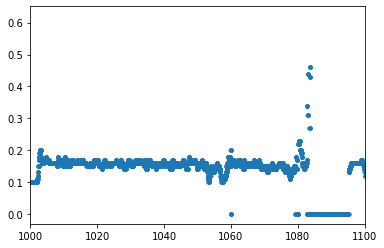

In [18]:
#plt.plot(df["lines_0_c0"], '.')
#plt.plot(df["lines_1_c0"], '.')
plt.plot(df["lane_width"], '.')
plt.xlim(1000, 1100)